# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        # <your code>
        
        return (1/(1+np.exp(-X)))
       
        pass
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
   
        return np.mean((y - self.predict_(x)) ** 2)
       
        pass
     
    def fit(self, X, y):
      
    
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        for i in range(self.max_iter):
            delta = np.random.choice(len(X))
            "<your code>"
            self.weights_ -= self.eta * delta
            if i % 1000 == 0: 
                return i, self.get_loss(X,y)
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        self.X_test = X_test
          
        
        self.m_test, self.n = X_test.shape
        
        Y_predict = np.zeros(self.m_test)
          
        for i in range(self.m_test) :
              
            x = self.X_test[i]
              
            
            neighbors = np.zeros(self.K)
              
            neighbors = self.find_neighbors(x)
              
            
              
            Y_pred[i] = mode( neighbors )[0][0]    
              
        return Y_pred
   
        pass

In [5]:
from sklearn import datasets
from sklearn import metrics

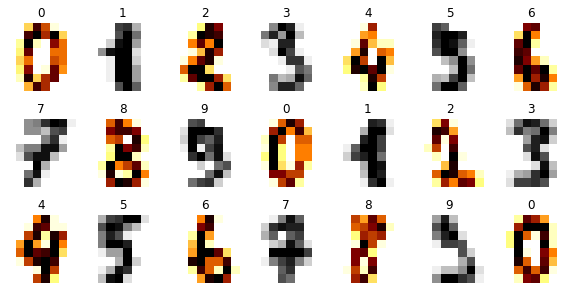

In [6]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [7]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [8]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [9]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [66]:
#assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                  # np.array([0.58662, 0.40131]))

In [ ]:
lr_clf.fit(X_train, y_train)

In [ ]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [ ]:
model = CustomLogisticRegression()

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
train_acc, test_acc

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [4]:
## your code


**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

#Zero initialization.If we set all the weights to be zero, then all the the neurons of all the layers performs the same calculation, giving the same output and there by making the whole deep net useless. If the weights are zero, complexity of the whole deep net would be the same as that of a single neuron and the predictions would be nothing better than random.
w_z=np.zeros((layer_size[l],layer_size[l-1]))
#Random Initialization
w_r=np.random.randn(layer_size[l],layer_size[l-1])*0.01
#zero initialization:
#cost after 15000 iterations:0.7
#accuracy: 0.5
#random initialization:
#cost after 15000 iterations:0.38
#accuracy: 0.83

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        # <your code>
        pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        # <your code>
        pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [3]:
PATH = './data/'

In [4]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Survived: Survival (0 = no; 1 = yes)
Pclass: Passenger class (1 = first; 2 = second; 3 = third)
Sex: Sex
Age: Age
Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

shape:  (100000, 11)
empty values:  Cabin       67866
Ticket       4623
Age          3292
Embarked      250
Fare          134
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
dtype: int64

 all passenger 
 male      56114
female    43886
Name: Sex, dtype: int64


Text(0.5, 1.0, 'All passengers')

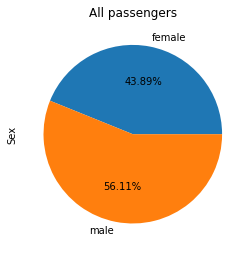

In [6]:
## your code

print('shape: ', data.shape)
print('empty values: ', data.isna().sum().sort_values(ascending=False))
print('\n all passenger \n', data.Sex.value_counts())
data.groupby(['Sex'])['Sex'].count().plot(kind='pie',figsize=(4,8),labels=['female', 'male'], autopct='%.2f%%')
plt.title('All passengers')

In [7]:
print(data.Survived.value_counts())
print(data.groupby('Sex').mean()['Survived'])
surv_percent = data.Survived.value_counts(normalize=True)*100
surv_percent.to_frame(name='Survived, %')

0    57226
1    42774
Name: Survived, dtype: int64
Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64


,"Survived, %"
0,57.226
1,42.774


In [8]:
data.groupby('Sex').sum().reset_index().head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,31226,84207,1701947.88,18764,24082,2420362.37
1,male,11548,126484,2007333.12,21005,21374,1966684.14


In [9]:
print(type(data.groupby('Sex').mean()))
data.groupby('Sex').mean()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.711525,1.918767,40.044890,0.427562,0.548740,55.225372
male,0.205795,2.254054,37.030884,0.374327,0.380903,35.094919


Survived,0,1,percentage
Sex,,,
female,12660,31226,71.152532
male,44566,11548,20.579535


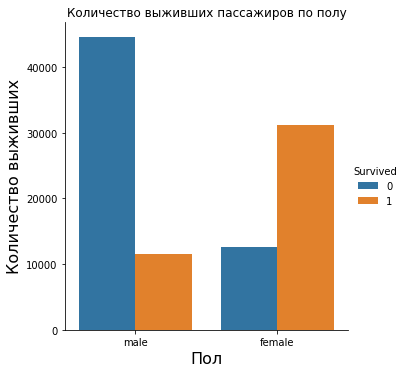

In [10]:
sns.catplot(x='Sex', data=data, hue='Survived', kind='count')
plt.title("Количество выживших пассажиров по полу")
plt.ylabel('Количество выживших', size=16)
plt.xlabel('Пол', size=16)
sex_data = data.groupby(['Sex', 'Survived']).size().unstack('Survived')
sex_data['percentage'] = sex_data[1]/(sex_data[0]+sex_data[1])*100
sex_data

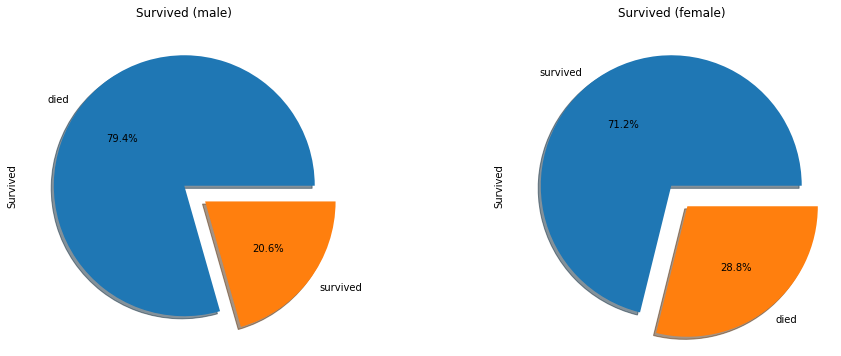

In [11]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data['Survived'][data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],labels=[ 'died', 'survived'], shadow=True)
data['Survived'][data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],labels=['survived', 'died'], shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [12]:
data.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187534
Pclass,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.417354
Age,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109164
SibSp,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059358
Parch,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061443
Fare,0.187534,-0.417354,0.109164,0.059358,0.061443,1.000000


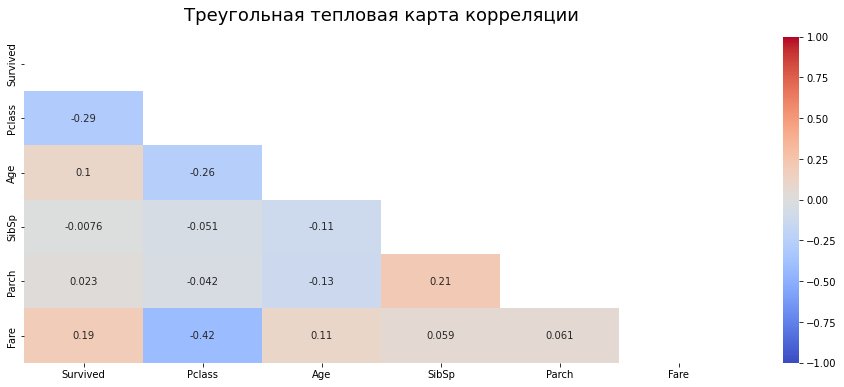

In [13]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':18}, pad=16);

Всего было 10000 пассажиров, большинство из них 56% были мужчины. Всего выжило 42774 человек или 42,8%. Большинство выживших 31226 человек или 71% были женщинами. Это объясняетя тем, что в первую очередь спасают женщин и детей 

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

In [14]:
data.groupby(['Survived']).Age.mean()

Survived
0    36.708695
1    40.553799
Name: Age, dtype: float64

In [15]:
data.groupby(['Survived']).Age.median()

Survived
0    36.0
1    43.0
Name: Age, dtype: float64

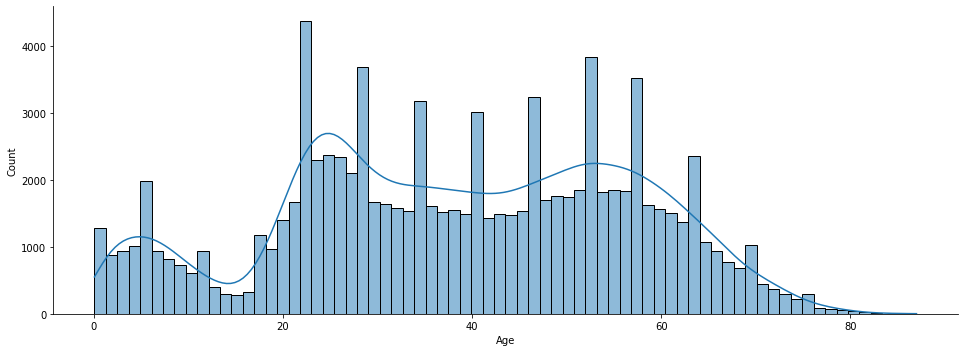

In [16]:
sns.displot(data=data.Age, kde=True, aspect=2.7)

In [17]:
data.groupby(['Survived','Sex']).Age.mean().to_frame('Mean_age')

Mean_age
Survived Sex              
0        female  37.009399
         male    36.623190
1        female  41.272830
         male    38.603821

In [18]:
data.groupby(['Survived','Sex']).Age.describe()

count       mean        std   min   25%   50%   75%   max
Survived Sex                                                                
0        female  12241.0  37.009399  20.845402  0.08  22.0  38.0  55.0  83.0
         male    43049.0  36.623190  16.845329  0.08  24.0  35.0  51.0  83.0
1        female  30260.0  41.272830  19.284150  0.08  27.0  44.0  57.0  87.0
         male    11158.0  38.603821  17.035270  0.08  26.0  40.0  52.0  85.0

In [19]:
#Разделим пассажиров на группы по возрастам
ages = [0, 7, 12, 21, 40, 60, np.inf]
data['Group(age)'] = pd.cut(data["Age"], bins=ages, labels = ['0-7', '7-12', '12-21', '21-40', '40-60', '>=60'])

In [20]:
data_age = data['Group(age)'].value_counts().to_frame()
data_age['Percentage'] = data['Group(age)'].value_counts()/len(data)
data_age

,Group(age),Percentage
21-40,34519,0.34519
40-60,33839,0.33839
>=60,11671,0.11671
0-7,7051,0.07051
12-21,6524,0.06524
7-12,3104,0.03104


Пассажиров 40-60 и 21-40 лет было приблизительно одинаковое значение, но все-таки большинство пассажиров было в возрасте 21-40 лет. Меньше всего было пассажиров от 7 до 12 лет.

In [21]:
data.groupby(['Survived'])['Group(age)'].value_counts()

Survived       
0         21-40    21940
          40-60    17848
          >=60      5408
          12-21     4269
          0-7       4250
          7-12      1575
1         40-60    15991
          21-40    12579
          >=60      6263
          0-7       2801
          12-21     2255
          7-12      1529
Name: Group(age), dtype: int64

Больше всего погибших было в возрасте 21-40 лет, но в процентном соотношении больше погибших в возрсте 0-21 года

In [22]:
data.groupby(['Survived'])['Group(age)'].value_counts()/len(data)

Survived       
0         21-40    0.21940
          40-60    0.17848
          >=60     0.05408
          12-21    0.04269
          0-7      0.04250
          7-12     0.01575
1         40-60    0.15991
          21-40    0.12579
          >=60     0.06263
          0-7      0.02801
          12-21    0.02255
          7-12     0.01529
Name: Group(age), dtype: float64

Большинство выживших 16% среди пассажиров в возрасте 40-60 лет

In [23]:
print("Passenger median age")
data.groupby(['Survived', 'Sex'], as_index=False).Age.median()

Passenger median age


,Survived,Sex,Age
0,0,female,38.0
1,0,male,35.0
2,1,female,44.0
3,1,male,40.0


In [24]:
print("Median age")
data.groupby(['Survived'], as_index=False).Age.median()

Median age


,Survived,Age
0,0,36.0
1,1,43.0


In [25]:
print("Average(mean) age")
data.groupby(['Survived'], as_index=False).Age.mean()

Average(mean) age


,Survived,Age
0,0,36.708695
1,1,40.553799


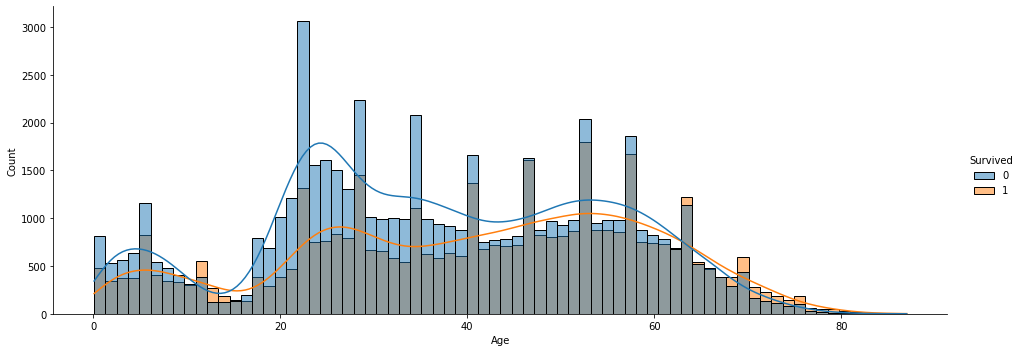

In [26]:
sns.displot(data=data, x='Age', kde=True, hue='Survived', aspect=2.7)

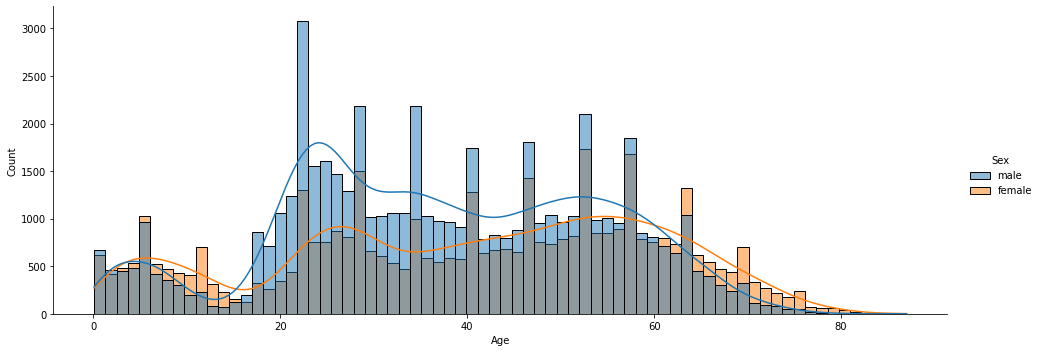

In [27]:
sns.displot(data=data, x='Age', kde=True, hue='Sex', aspect=2.7)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

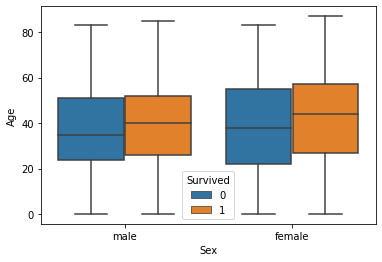

In [28]:
sns.boxplot(data = data, x='Sex', y='Age', hue = 'Survived')

Медиана  выживших 42 года, а погибших 37 лет, среднее значение возраста выживших 40,5 лет, а погибших 37 лет. Возраст выживших в среднем больше, чем погибших, спасшиеся женщины старше, чем мужчины. Всего на корбле было 36% пассажиров 21-40 лет, из них выжило только треть, в то время как пассажиров 40-60 летнего возраста было 35%, из них впоследствии выжило 16%, т.е. 50%, значит процент выживших пассажиров 40-60 летнего возраста больше, чем выживших 21-40 летнего возраста. Среди других групп возрастов число выживших от общего количества так сильно не отличается. Это объясняется тем, что в первую очередь спасались люди в более старшем возрасте. Возможно это было связано с наличием семьи и детей либо престарелых родственников, которые они должны были сопровождать. 

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

Определим соотношение пассажиров в разных классах

Text(0.5, 1.0, 'Распределение пассажиров по классу')

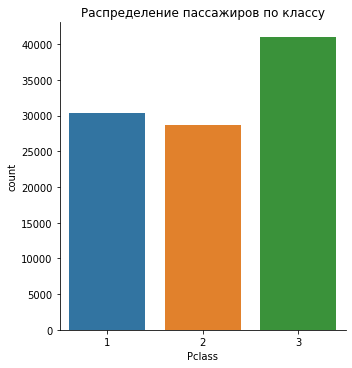

In [29]:
sns.catplot(x='Pclass', data=data, kind='count')
plt.title("Распределение пассажиров по классу")

Большинство пассажиров ехало в 3 классе. Определим, сколько пассажиров какого пола ехало в каждом классе

Text(0.5, 1.0, 'Распределение пассажиров по полу в каждом классе')

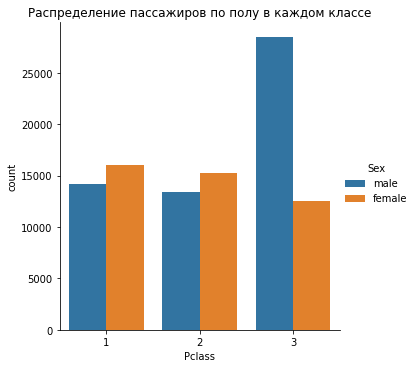

In [30]:
sns.catplot(x='Pclass', data=data, hue='Sex', kind='count')
plt.title("Распределение пассажиров по полу в каждом классе")

Большинство мужчин ехало в 3 классе. Построим зависимость спасенных людей от класса, в котором они ехали

Text(0.5, 1.0, 'Распределение выживших по классам')

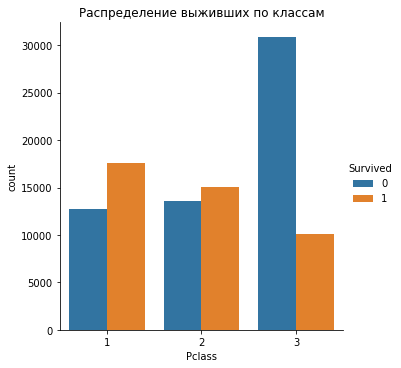

In [31]:
sns.catplot(x='Pclass', data=data, hue='Survived', kind='count')
plt.title("Распределение выживших по классам")

Меньше всего выживших было среди пассажиров-мужчин 3 класса. Определим соотношение выживших по полу и классу

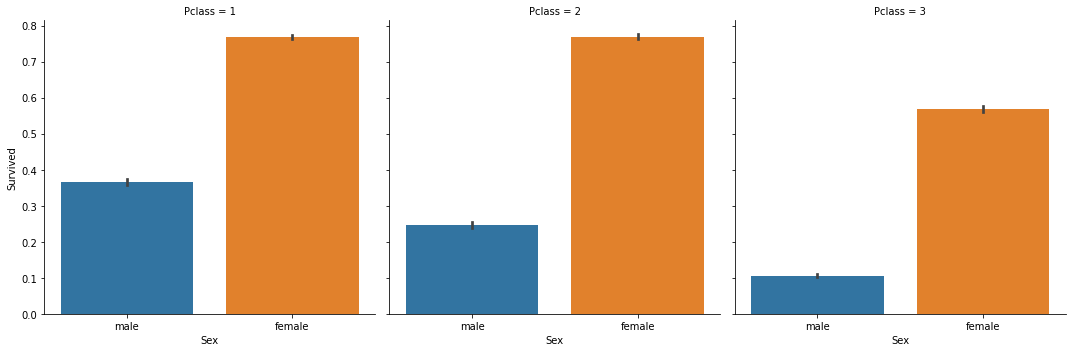

In [32]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=data, kind='bar')

Меньше всего спасенных было в 3 классе. Определим, сколько пассажиров в каждом классе было в зависимости от места посадки

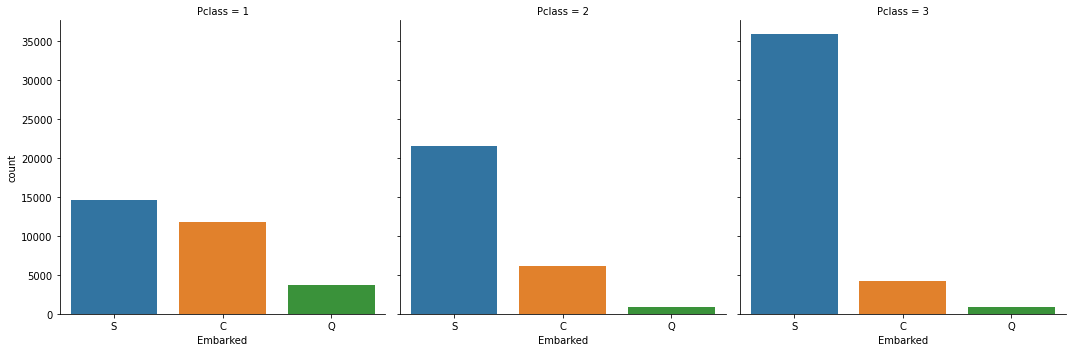

In [33]:
sns.catplot(x='Embarked', col='Pclass', data=data, kind='count')

Большинство пассажиров было из пункта S. Определим, сколько выжило

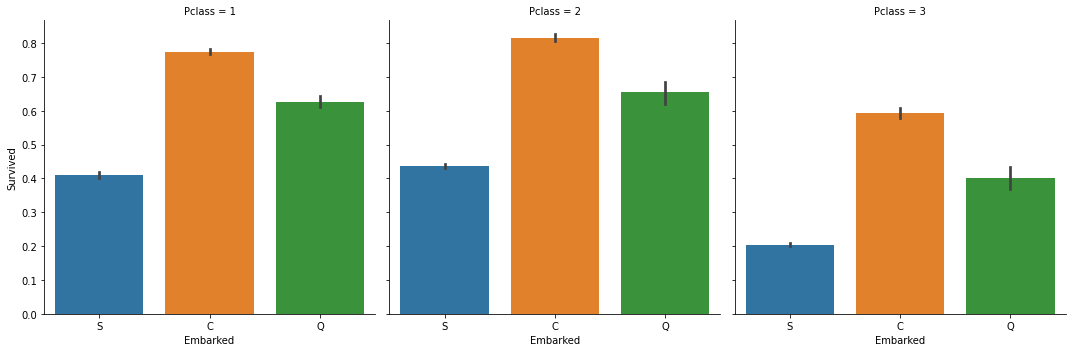

In [35]:
sns.catplot(x='Embarked', y='Survived', col='Pclass', data=data, kind='bar')

Большинство выживших было из пункта C и из первого класса.

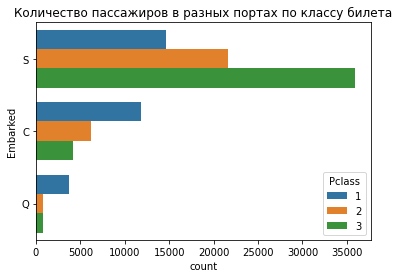

In [36]:
sns.countplot(y=data['Embarked'],hue=data['Pclass'])
plt.title("Количество пассажиров в разных портах по классу билета")
plt.show()

Большинство выживших пассажиров было из первого класса из пункта С. Частично это объясняется тем, что в первом классе больше было женщин и в пункте С большая часть пассажиров покупала билет на 1 класс.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [37]:
## your code
data_null = data.isnull().sum().to_frame('Nuls')
data_null['Percentage'] = data_null['Nuls']/len(data)*100
data_null

,Nuls,Percentage
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
Age,3292,3.292
SibSp,0,0.000
Parch,0,0.000
Ticket,4623,4.623
Fare,134,0.134
Cabin,67866,67.866


In [38]:
display(data.groupby(data['Ticket'].isnull()).describe())
display(data.groupby(data['Fare'].isnull()).describe())
display(data.groupby(data['Cabin'].isnull()).describe())
display(data.groupby(data['Embarked'].isnull()).describe())

Survived                                                Pclass  \
          count      mean       std  min  25%  50%  75%  max    count   
Ticket                                                                  
False   95377.0  0.423173  0.494065  0.0  0.0  0.0  1.0  1.0  95377.0   
True     4623.0  0.521955  0.499572  0.0  0.0  1.0  1.0  1.0   4623.0   

                  ... Parch          Fare                                     \
            mean  ...   75%  max    count       mean        std   min    25%   
Ticket            ...                                                          
False   2.072827  ...   1.0  9.0  95249.0  45.412088  70.843704  0.68  10.23   
True    2.810080  ...   0.0  6.0   4617.0  13.339950  15.035303  2.46   8.32   

                              
          50%    75%     max  
Ticket                        
False   25.15  34.40  744.66  
True     9.98  12.51  548.05  

[2 rows x 48 columns]

Survived                                                Pclass  \
         count      mean       std  min  25%  50%  75%  max    count   
Fare                                                                   
False  99866.0  0.427703  0.494748  0.0  0.0  0.0  1.0  1.0  99866.0   
True     134.0  0.455224  0.499860  0.0  0.0  0.0  1.0  1.0    134.0   

                 ... Parch          Fare                                   \
           mean  ...   75%  max    count      mean       std   min    25%   
Fare             ...                                                        
False  2.106933  ...   1.0  9.0  99866.0  43.92933  69.58882  0.68  10.04   
True   2.089552  ...   1.0  3.0      0.0       NaN       NaN   NaN    NaN   

                            
         50%   75%     max  
Fare                        
False  24.46  33.5  744.66  
True     NaN   NaN     NaN  

[2 rows x 48 columns]

Survived                                                Pclass  \
         count      mean       std  min  25%  50%  75%  max    count   
Cabin                                                                  
False  32134.0  0.608608  0.488069  0.0  0.0  1.0  1.0  1.0  32134.0   
True   67866.0  0.342101  0.474417  0.0  0.0  0.0  1.0  1.0  67866.0   

                 ... Parch          Fare                                     \
           mean  ...   75%  max    count       mean        std   min    25%   
Cabin            ...                                                          
False  1.243418  ...   1.0  9.0  32092.0  90.893801  98.606899  3.52  27.90   
True   2.515766  ...   0.0  9.0  67774.0  21.690953  31.506181  0.68   8.96   

                                
         50%       75%     max  
Cabin                           
False  61.90  112.8825  744.66  
True   12.06   27.3200  688.30  

[2 rows x 48 columns]

Survived                                                Pclass  \
            count      mean       std  min  25%  50%  75%  max    count   
Embarked                                                                  
False     99750.0  0.427589  0.494731  0.0  0.0  0.0  1.0  1.0  99750.0   
True        250.0  0.488000  0.500859  0.0  0.0  0.0  1.0  1.0    250.0   

                    ... Parch          Fare                              \
              mean  ...   75%  max    count       mean        std   min   
Embarked            ...                                                   
False     2.107098  ...   1.0  9.0  99617.0  43.913319  69.572191  0.68   
True      2.032000  ...   1.0  4.0    249.0  50.335060  75.831302  2.16   

                                       
            25%    50%    75%     max  
Embarked                               
False     10.03  24.45  33.49  744.66  
True      10.86  26.62  52.57  510.51  

[2 rows x 48 columns]

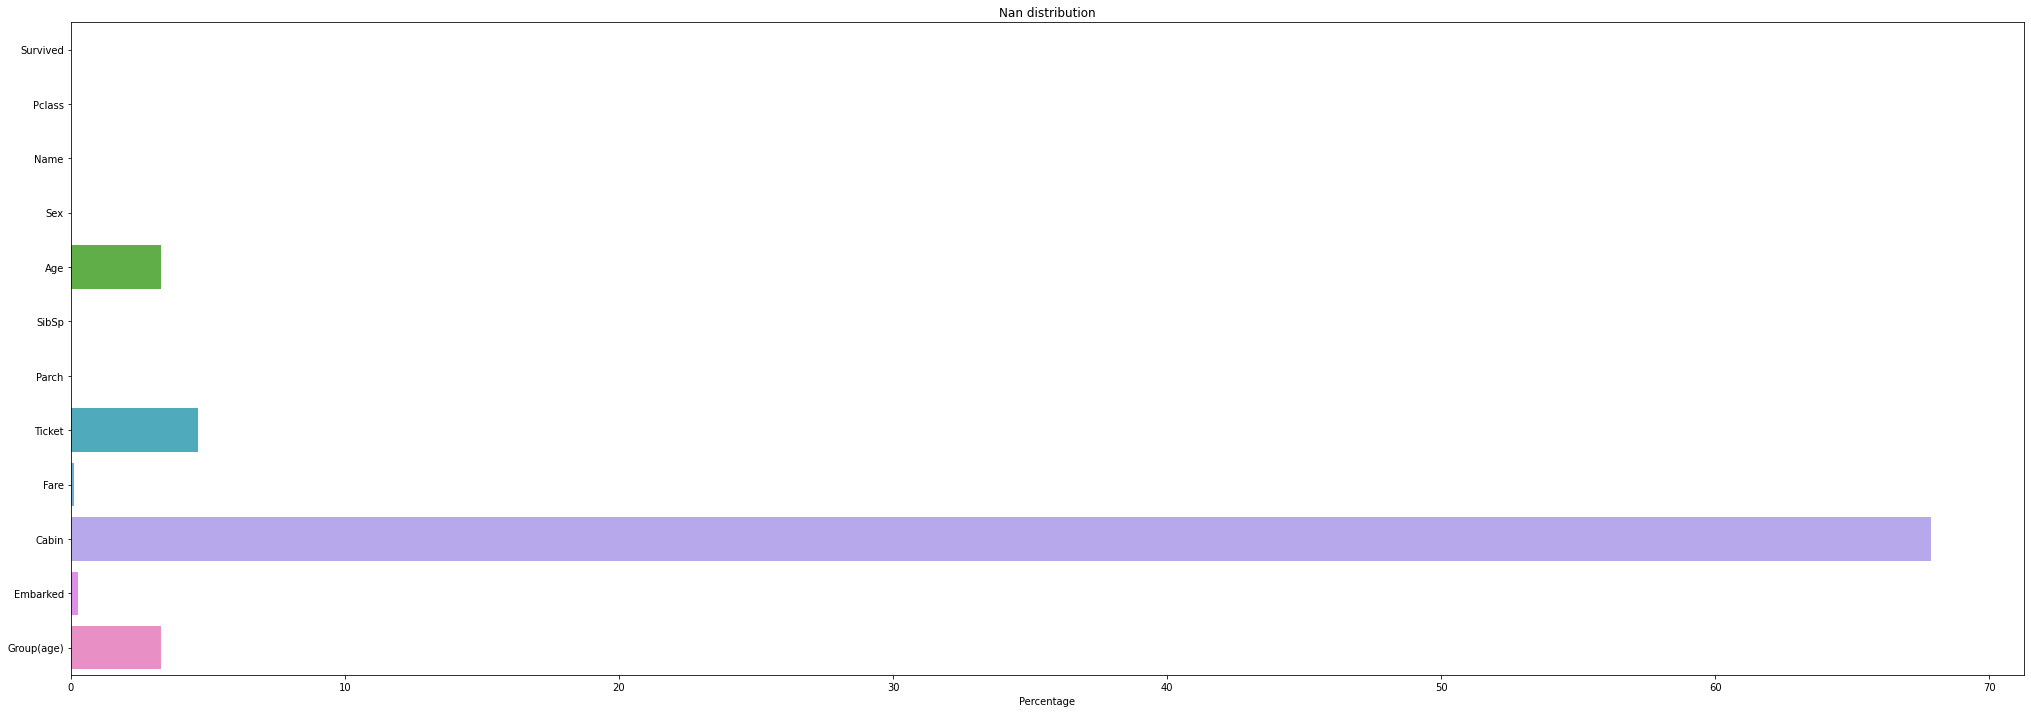

In [39]:
plt.figure(figsize=(35,12))
plt.title('Nan distribution')
sns.barplot(x=data_null.Percentage, y=data_null.index);

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< your thoughts >

<AxesSubplot:ylabel='Percentage'>

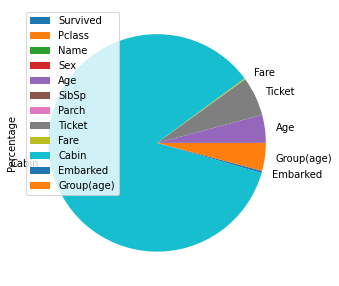

In [40]:
data_null.plot.pie(y='Percentage', figsize=(5, 5))

Пропущенные значения по Fare можно заменить на среднее значение стоимости билета в зависимости от класса билета, пропущенные значения возраста на среднее значение возраста 

In [41]:
## Заменим пустые значения по возрасту средними по полу
data['Age'] = data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'))

In [42]:
data['Embarked'].value_counts(dropna=False, normalize=True)

S      0.72139
C      0.22187
Q      0.05424
NaN    0.00250
Name: Embarked, dtype: float64

In [43]:
#Заменим пустые значения порта посадки на наиболее чсто встречающийся
data["Embarked"]= data["Embarked"].fillna("S")

In [44]:
#Проверим пустые значения Cabin
data.Cabin.isna().sum()/len(data)

0.67866

In [51]:
#Проверим 
data.Cabin.value_counts().to_frame()

,Cabin
C19828,6
C6906,5
C13699,5
C14534,5
B11110,5
...,...
A21234,1
A4905,1
C7208,1
A5788,1


Наиболее часто встречающиеся номера с буквами, поэтому пропущенные значения заменим на N, а в остальных оставим только 1 букву

In [45]:
data.Cabin.fillna(value='N', inplace=True)
data.Cabin = data.Cabin.str[0]

In [46]:
data.Ticket.value_counts().idxmax()

'A/5 '

In [47]:
#Заменим поля билет на наиболее часто встречающиеся

data.Ticket.fillna(value='A/5', inplace=True)

In [48]:
#Заменим поле стоимость билета средними по классу
data['Fare'] = data.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.mean()))

In [49]:
#Проверяем остались ли пустые значения
data.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Group(age)    3292
dtype: int64

In [50]:
#Удалим уже ненужный столбе Group age
data.drop(columns='Group(age)', inplace=True)

In [51]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,37.030884,2,0,209245,27.14,C,S
1,0,3,"Bryan, Drew",male,37.030884,0,0,27323,13.35,N,S
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,N,S
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,N,S
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,N,S


**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

Теперь нужно нормализовать данные.

In [52]:
#Полем Cabin можно пренебречь
data= data.drop(['Cabin'],axis=1)

In [53]:
data = data.drop(['Ticket'],axis=1)

In [54]:
data = data.drop(['Name'],axis=1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Sex       100000 non-null  object 
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Fare      100000 non-null  float64
 7   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 8.9+ MB


In [73]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,37.030884,2,0,27.14,S
1,0,3,male,37.030884,0,0,13.35,S
2,0,3,male,0.330000,1,2,71.29,S
3,0,3,male,19.000000,0,0,13.04,S
4,1,3,male,25.000000,0,0,7.76,S


In [74]:
#Заменим пол на 1 и 2
data['Sex'] = data['Sex'].replace(['female'],'1')
data['Sex'] = data['Sex'].replace(['male'],'0')

In [75]:
#Заменим порт посадки на 1, 2, 3
data['Embarked'] = data['Embarked'].replace(['S'],'0')
data['Embarked'] = data['Embarked'].replace(['Q'],'1')
data['Embarked'] = data['Embarked'].replace(['C'],'2')

Проверим с помощью логистической регрессии

In [76]:
X= data.drop('Survived', axis=1)
y= data['Survived']
X= data.drop('Survived', axis=1)
y= data['Survived']

In [77]:
#Разделим датасет на test и train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [78]:
#Проскалируем данные

scaler= StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [79]:
#Тренируем модель
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression()

In [80]:
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [81]:
y_pred= logistic_model.predict(scaled_X_test)

In [82]:
from sklearn.metrics import classification_report, plot_confusion_matrix

accuracy_score(y_test, y_pred)

0.7656

Мы получили 0.77 точность  Logistic Regression

C:\Users\НР\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


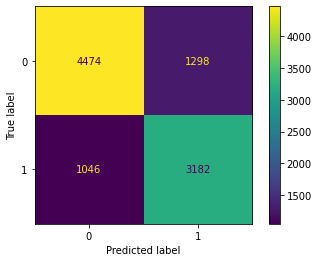

In [84]:
plot_confusion_matrix(logistic_model, scaled_X_test, y_test)

True Positive: 4474
True Negetive: 1046
False Positive: 1298
False Negetive: 3182

K-nearest neighbors

In [85]:
knn_model= KNeighborsClassifier(n_neighbors=1)

In [86]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
y_pred= knn_model.predict(scaled_X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6831

Мы получили 0.68 точность с помощью KNN способа

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      5772
           1       0.62      0.63      0.63      4228

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [ ]:
## your code

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.